<a href="https://colab.research.google.com/github/srimantmahapatra/srimant_code_repo_pub/blob/master/Chicago_Traffic_Crashes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analytics Tasks :

1.Read the CSV files containing the Chicago traffic crash data.

2.Identify the column common to both files and merge them together on that column. Then display the total number of reported crashes.

3.Change the ‘CRASH_DATE’ column to a date format. Drop observations that did not occur in 2017, 2018 or 2019 (other years have incomplete data).

4.Display a plot showing the number of crashes that occur for each hour of the day.

5.Name the make of vehicle that was involved in the most daylight crashes in August 2018. Remember that a crash can involve multiple vehicles.

6.Determine which weather condition was most prevalent for each type of crash.

7.Plot the primary contributing cause of reported crashes, from highest to lowest.

8.Display the 10 state license plates involved in the most crashes. Remember that a crash can involve multiple vehicles.

9.Display the proportion of crashes in each month of 2019 where alcohol was determined to be the primary contributing cause.

10.Determine whether snowmobiles or recreational off-highway vehicles were involved in more crashes.

11.Display a cluster map showing the locations of crashes involving a hit and run. (Not completed as GPU not supporting)

**IMPORT THE NECESSARY LIBRARIES**

In [81]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style='darkgrid')
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
np.set_printoptions(threshold=np.inf)
plt.figure(figsize=(30, 30))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

IMPORT DATA FROM GOOGLE DRIVE 


In [88]:
df_crashes = pd.read_csv('/content/drive/MyDrive/ML/ Chicago_Traffic_Crashes/crashes.csv')
df_vehicles =pd.read_csv('/content/drive/MyDrive/ML/ Chicago_Traffic_Crashes/crashes_vehicles.csv').drop('CRASH_DATE', axis=1)

In [13]:
df_crashes.head(2)


,CRASH_RECORD_ID,CRASH_DATE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,LATITUDE,LONGITUDE
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,7/10/2019 17:56,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,6/30/2017 16:00,CLEAR,DAYLIGHT,TURNING,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.741804,-87.740954


In [24]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474262 entries, 0 to 474261
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          474262 non-null  object 
 1   CRASH_DATE               474262 non-null  object 
 2   WEATHER_CONDITION        474262 non-null  object 
 3   LIGHTING_CONDITION       474262 non-null  object 
 4   FIRST_CRASH_TYPE         474262 non-null  object 
 5   HIT_AND_RUN_I            138818 non-null  object 
 6   PRIM_CONTRIBUTORY_CAUSE  474262 non-null  object 
 7   LATITUDE                 471658 non-null  float64
 8   LONGITUDE                471658 non-null  float64
dtypes: float64(2), object(7)
memory usage: 32.6+ MB


In [16]:

df_vehicles.head(2)


,CRASH_RECORD_ID,VEHICLE_ID,MAKE,LIC_PLATE_STATE,VEHICLE_TYPE
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,796949.0,INFINITI,IL,PASSENGER
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,HONDA,IL,PASSENGER


In [25]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968023 entries, 0 to 968022
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CRASH_RECORD_ID  968023 non-null  object 
 1   VEHICLE_ID       945532 non-null  float64
 2   MAKE             945527 non-null  object 
 3   LIC_PLATE_STATE  865792 non-null  object 
 4   VEHICLE_TYPE     945532 non-null  object 
dtypes: float64(1), object(4)
memory usage: 36.9+ MB


In [85]:
df=pd.merge(df_crashes,df_vehicles,on='CRASH_RECORD_ID').reset_index()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968023 entries, 0 to 968022
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    968023 non-null  int64  
 1   CRASH_RECORD_ID          968023 non-null  object 
 2   CRASH_DATE               968023 non-null  object 
 3   WEATHER_CONDITION        968023 non-null  object 
 4   LIGHTING_CONDITION       968023 non-null  object 
 5   FIRST_CRASH_TYPE         968023 non-null  object 
 6   HIT_AND_RUN_I            289254 non-null  object 
 7   PRIM_CONTRIBUTORY_CAUSE  968023 non-null  object 
 8   LATITUDE                 962859 non-null  float64
 9   LONGITUDE                962859 non-null  float64
 10  VEHICLE_ID               945532 non-null  float64
 11  MAKE                     945527 non-null  object 
 12  LIC_PLATE_STATE          865792 non-null  object 
 13  VEHICLE_TYPE             945532 non-null  object 
dtypes: f

In [86]:
print (  'Total Number of Reported crashes is '+ str(df['CRASH_RECORD_ID'].nunique()))

Total Number of Reported crashes is 474262


In [90]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df_crashes['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

In [69]:
df = df[(df['CRASH_DATE'] >= '2018-01-01') & (df['CRASH_DATE'] <= '2020-12-31')]

In [70]:
df.head(5)

,index,CRASH_RECORD_ID,CRASH_DATE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,LATITUDE,LONGITUDE,VEHICLE_ID,MAKE,LIC_PLATE_STATE,VEHICLE_TYPE,Hour
0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288,656940.0,GEO,IL,PASSENGER,17
1,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288,656945.0,NISSAN,IL,PASSENGER,17
4,4,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,CLEAR,DAYLIGHT,REAR END,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.773456,-87.585022,867994.0,TOYOTA,IL,PASSENGER,10
5,5,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,CLEAR,DAYLIGHT,REAR END,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.773456,-87.585022,868000.0,OLDSMOBILE,IL,PASSENGER,10
6,6,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,CLEAR,DAYLIGHT,REAR END,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.773456,-87.585022,868009.0,CHRYSLER,MI,PASSENGER,10


In [91]:
df['Hour']=df.CRASH_DATE.dt.hour

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672831 entries, 0 to 967749
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    672831 non-null  int64         
 1   CRASH_RECORD_ID          672831 non-null  object        
 2   CRASH_DATE               672831 non-null  datetime64[ns]
 3   WEATHER_CONDITION        672831 non-null  object        
 4   LIGHTING_CONDITION       672831 non-null  object        
 5   FIRST_CRASH_TYPE         672831 non-null  object        
 6   HIT_AND_RUN_I            205825 non-null  object        
 7   PRIM_CONTRIBUTORY_CAUSE  672831 non-null  object        
 8   LATITUDE                 668899 non-null  float64       
 9   LONGITUDE                668899 non-null  float64       
 10  VEHICLE_ID               655675 non-null  float64       
 11  MAKE                     655670 non-null  object        
 12  LIC_PLATE_STATE 

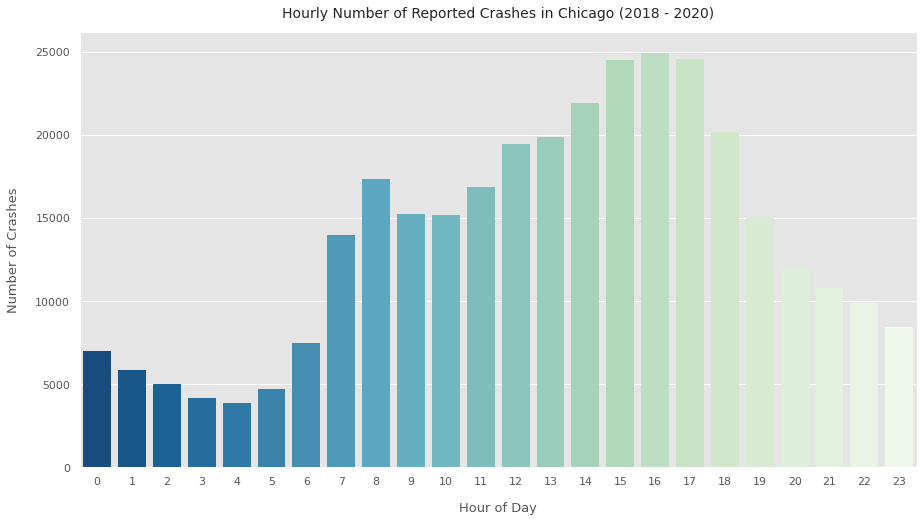

In [53]:
# Plot number of crashes by hour of day.
plt.figure(figsize=(15,8))
s = sns.barplot(data=df.groupby('Hour')['CRASH_RECORD_ID'].nunique().reset_index(), x='Hour', y='CRASH_RECORD_ID', palette='GnBu_r', linewidth=0)
s.set_title('Hourly Number of Reported Crashes in Chicago (2018 - 2020)', y=1.02, fontsize=14)
s.set_xlabel('Hour of Day', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.show()

In [54]:
# Subset the DataFrame for crashes that occurred during daylight.
df_daylight = df[df['LIGHTING_CONDITION'] == 'DAYLIGHT']

# Determine the make of vehicle involved in the most crashes.
df_daylight['MAKE'].value_counts().nlargest(1)

CHEVROLET    49779
Name: MAKE, dtype: int64

In [56]:
df_crashes.groupby('FIRST_CRASH_TYPE')['WEATHER_CONDITION'].apply(lambda x: x.value_counts().head(1)).reset_index(name='COUNT').rename(columns={'level_1': 'WEATHER'})

,FIRST_CRASH_TYPE,WEATHER,COUNT
0,ANGLE,CLEAR,39988
1,ANIMAL,CLEAR,282
2,FIXED OBJECT,CLEAR,15972
3,HEAD ON,CLEAR,3145
4,OTHER NONCOLLISION,CLEAR,1174
5,OTHER OBJECT,CLEAR,3370
6,OVERTURNED,CLEAR,196
7,PARKED MOTOR VEHICLE,CLEAR,83117
8,PEDALCYCLIST,CLEAR,6066
9,PEDESTRIAN,CLEAR,8479


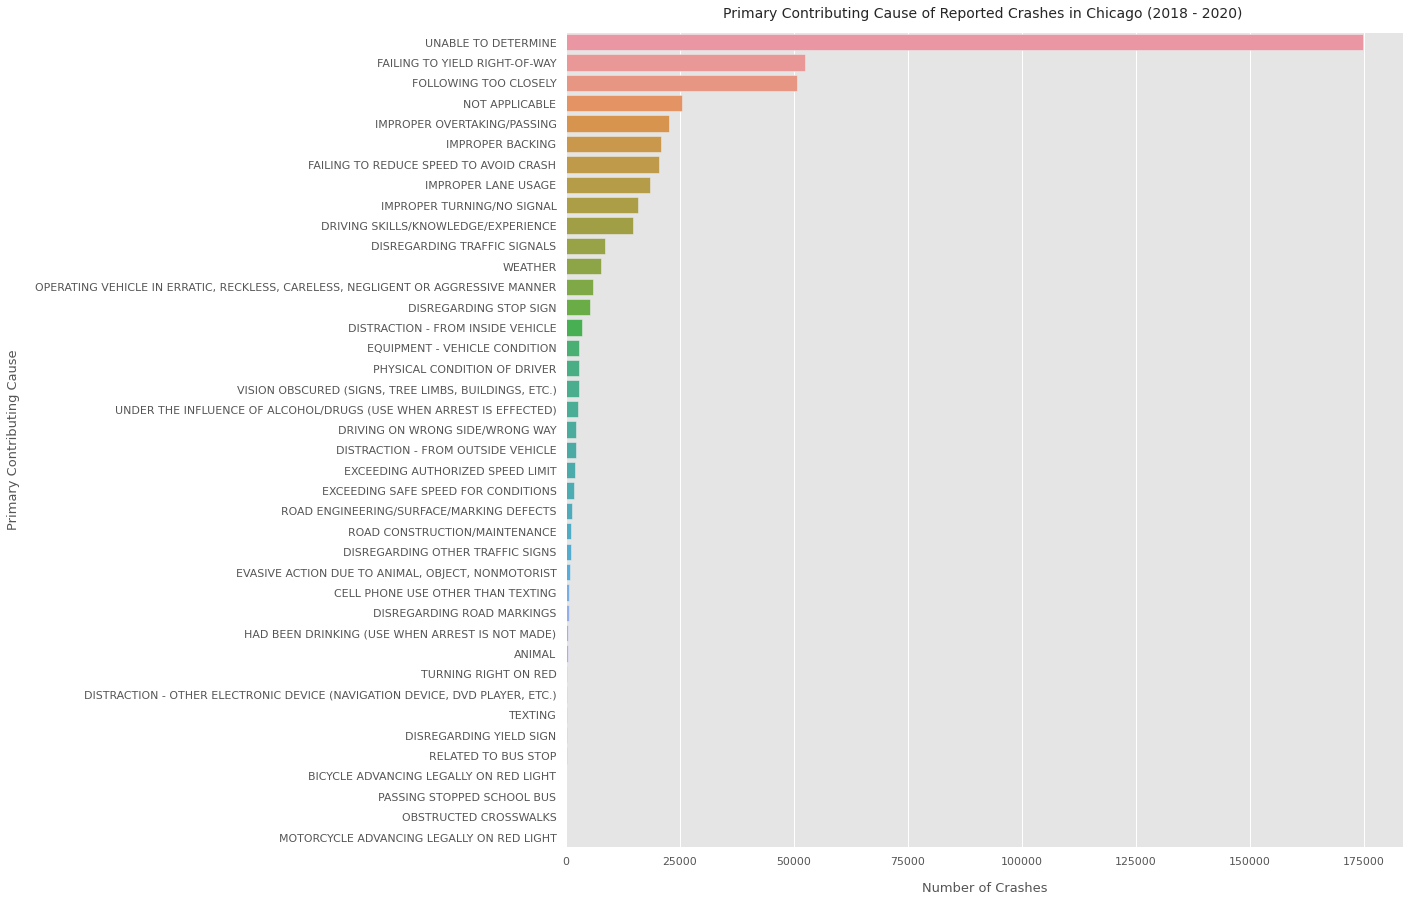

In [57]:
# Display a plot showing the primary contributing cause of reported crashes.
plt.figure(figsize=(15, 15))
sns.countplot(data=df_crashes,  y='PRIM_CONTRIBUTORY_CAUSE', order = df_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.title('Primary Contributing Cause of Reported Crashes in Chicago (2018 - 2020) ', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=13, labelpad=15)
plt.show();

In [58]:
df.groupby('LIC_PLATE_STATE')['VEHICLE_ID'].count().nlargest(10).reset_index(name='COUNT')

,LIC_PLATE_STATE,COUNT
0,IL,550630
1,XX,12128
2,IN,11914
3,WI,3793
4,MI,2554
5,FL,1802
6,TX,1739
7,OH,1516
8,AZ,1333
9,IA,1121


In [92]:
# Subset to crashes reported in 2019 and count number of crashes per month.
df_alcohol = df_crashes[(df_crashes['CRASH_DATE'] >= '2019-01-01') & (df_crashes['CRASH_DATE'] <= '2019-12-31')]
df_total = df_alcohol.groupby(df_alcohol['CRASH_DATE'].dt.strftime('%m'))['CRASH_RECORD_ID'].nunique()

# Subset to crashes with alcohol as the primary contributing cause and count number per month.
df_alcohol = df_crashes[df_crashes['PRIM_CONTRIBUTORY_CAUSE'].str.contains('ALCOHOL|DRINKING')]
df_alcohol = df_alcohol.groupby(df_alcohol['CRASH_DATE'].dt.strftime('%m'))['CRASH_RECORD_ID'].nunique()

# Calculate the porportions and display a well formatted result.
df_proportion = df_alcohol / df_total * 100
df_proportion.reset_index().rename(columns={'CRASH_DATE': 'MONTH', 'CRASH_RECORD_ID': 'PROPORTION'})

,MONTH,PROPORTION
0,01,3.712734
1,02,2.470187
2,03,2.208434
3,04,2.265337
4,05,2.079304
5,06,2.285660
6,07,2.259674
7,08,2.787247
8,09,2.955224
9,10,2.898698


In [76]:
print('Number of snowmobiles:', str(len(df[df['VEHICLE_TYPE'] == 'SNOWMOBILE'])))

Number of snowmobiles: 4


In [77]:
print('Number of recreational off-highway vehicles:', str(len(df[df['VEHICLE_TYPE'] == 'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)'])))


Number of recreational off-highway vehicles: 6
